In [1]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('../resource/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0 / (1 + exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

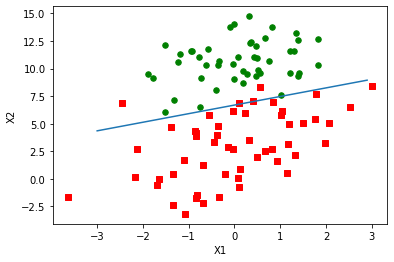

In [2]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    weights = wei.getA()
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()

plotBestFit(gradAscent(dataArr, labelMat))

In [3]:
# 随机梯度上升算法
def stocGradAscent0(dataMatrix, classLabels):
    m, n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

# 随机梯度上升算法
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
            del(dataIndex[randIndex])
    return weights

dataArr, labelMat = loadDataSet()
mat(stocGradAscent0(array(dataArr), labelMat))

matrix([[ 1.01702007,  0.85914348, -0.36579921]])